# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [42]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

## The estimation game


Root mean squared error is one of several ways to summarize the average error of an estimation process.

In [43]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

The following function simulates experiments where we try to estimate the mean of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and collect the mean and median of each sample.

In [44]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.38210449686562414
rmse median 0.4667340425947096


Using $\bar{x}$ to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE.  But using the median is more robust in the presence of outliers or large errors.


## Estimating variance

The obvious way to estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

The following function computes the mean error for a collection of estimates.

In [45]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and two estimates for each sample, $S^2$ and $S_{n-1}^2$.

In [46]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.134742794534602
mean error unbiased 0.009466739709631003


The mean error for $S^2$ is non-zero, which suggests that it is biased.  The mean error for $S_{n-1}^2$ is close to zero, and gets even smaller if we increase `iters`.

## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [47]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

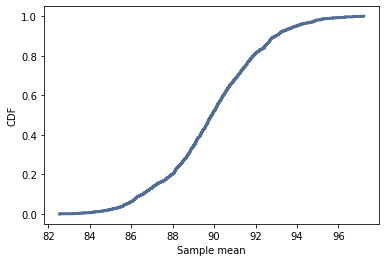

In [48]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

The mean of the sample means is close to the actual value of $\mu$.

In [49]:
np.mean(xbars)

89.89246230326727

An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [50]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(85.76840103678546, 93.94681012279248)

And the RMSE of the sample means is called the standard error.

In [51]:
stderr = RMSE(xbars, 90)
stderr

2.442486077932284

Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

## Estimating rates

The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample. 

In [52]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 1.113606523420915
rmse Lm 1.9799971841654078
mean error L 0.3463943959049311
mean error Lm 0.5694135475146807


The RMSE is smaller for the sample mean than for the sample median.

But neither estimator is unbiased.

## Exercises

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [53]:
# copied the function from above and replaced by calling Mean Error Function
# instead of RMSE function
def EstimateSol1(n=7, iters=1000):
    """Evaluates Mean Error of sample mean and median as estimators.
    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('EstimateSol1')
    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))
    
EstimateSol1()

EstimateSol1
mean error xbar -0.0032439437430396047
mean error median -0.01046415523875132


In [54]:
# copied the function from above and replaced by calling RMSE Function
# instead of MeanError function
def EstimateSol2(n=7, iters=1000):
    
    """Evaluates RMSE of 𝑆2 and  𝑆2𝑛−1  estimators.
    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('EstimateSol2')
    print('rmse biased', RMSE(estimates1, sigma**2))
    print('rmse error unbiased', RMSE(estimates2, sigma**2))
    
EstimateSol2()

EstimateSol2
rmse biased 0.4967749210807422
rmse error unbiased 0.5537425786048419


In [55]:
# Solution goes here

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



n: 10
standard error 0.8245472088144354
confidence interval (1.2340326445663867, 3.7618524836500122)


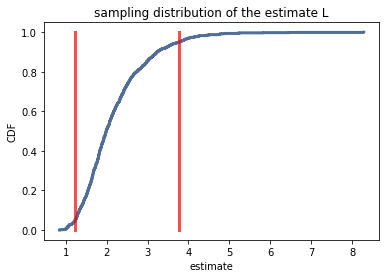

In [56]:
# λ=2, num of iteration = 1000, sample size = 10
def Simulate(lam=2, n=10, iters=1000):
    
    print("n:",n)
    # Variable to hold estimate values
    estimates = []
    
    # iterating over number of iteration to create sample
    for _ in range(iters):
        # as mean = 1/λ
        xs = np.random.exponential(1.0/lam, n)
        L = 1.0 / np.mean(xs)
        estimates.append(L)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    # Creating cdf out of estimates
    cdf = thinkstats2.Cdf(estimates)
    
    # CI 90% is the middle 90% of the cdf values.
    # So calculating 5th and 95th percentile
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    
    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                    title='sampling distribution of the estimate L')
    
    # function to plot the CI as vertical line on the existing plot
    # Found this way of representing after looking at the soln, better than just showing numbers
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='red')
    
    VertLine(ci[0])
    VertLine(ci[1])
    
    
Simulate(n=10)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990]
[nan, 0.8077303668560571, 0.4981768498059434, 0.4033948005580457, 0.32456426685899314, 0.28070620535786817, 0.2759081548923711, 0.23944567042585335, 0.22166886613015838, 0.2146738784433482, 0.20966457719921505, 0.18849146104576894, 0.18318090643258578, 0.1762320846562613, 0.16747395615553165, 0.16509641179739395, 0.15537977526872485, 0.15545975433110285, 0.14919970056779314, 0.14850513017214798, 0.1378160775612003, 0.14010104425250264, 0.13618900125619485, 0.1294731929507935, 0.12707519488269856, 0.131145

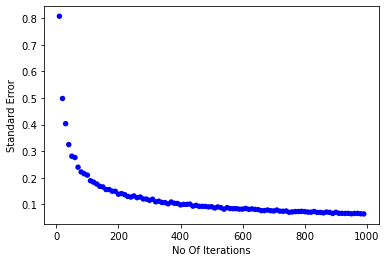

In [62]:
# Repeat the experiment with a few different values of n and make a plot of standard error versus n.
# Following are the results after running with different sample sizes
# n , Standard Error, CI(90%)
# 10 0.7703649632025837  (1.2759656394359575, 3.635129808549489)
# 20 0.49036844054157414 (1.4225959264914474, 2.9927692511572603)
# The Values changed after i reran, thats why not matching with results. 


# Replicated the above function, which just returns the standard error for plotting purpose
# otherwise it was also calling the plot function too again and again
def SimulateStdErr(lam=2, n=0, iters=1000):
    
    # print("n:",n)
    # Variable to hold estimate values
    estimates = []
   
    # iterating over number of iteration to create sample
    for _ in range(iters):
        # as mean = 1/λ
        xs = np.random.exponential(1.0/lam, n)
        L = 1.0 / np.mean(xs)
        estimates.append(L)

    stderr = RMSE(estimates, lam)
    return stderr
    

# Setting the values for scatter plots
stderr = []
nVals = []

# Calculating the values for Scatter plot
for x in range(0, 1000, 10):
    nVals.append(x)
    stderr.append(SimulateStdErr(n=x))

# Different Values of n along with std error
print(nVals)
print(stderr)

# Trying to plot the Standard Error vs in n
thinkplot.Scatter(nVals, stderr, alpha=1)
thinkplot.Config(xlabel='No Of Iterations',
                 ylabel='Standard Error',
                 legend=False)


**Exercise:** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [58]:
def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

In [59]:
# Solution goes here

In [60]:
# Solution goes here